In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')   

In [2]:
df = pd.read_csv('stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
print (f"There are {df['gender'].nunique()} categories in gender= {df['gender'].unique()}")
print (f"There are {df['race_ethnicity'].nunique()} categories in race_ethnicity= {df['race_ethnicity'].unique()}")
print (f"There are {df['parental_level_of_education'].nunique()} categories in parental_level_of_education= {df['parental_level_of_education'].unique()}")
print (f"There are {df['lunch'].nunique()} categories in lunch= {df['lunch'].unique()}")
print (f"There are {df['test_preparation_course'].nunique()} categories in test_preparation_course= {df['test_preparation_course'].unique()}")



There are 2 categories in gender= ['female' 'male']
There are 5 categories in race_ethnicity= ['group B' 'group C' 'group A' 'group D' 'group E']
There are 6 categories in parental_level_of_education= ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
There are 2 categories in lunch= ['standard' 'free/reduced']
There are 2 categories in test_preparation_course= ['none' 'completed']


In [19]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
caltegorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"There are {len(numerical_features)} numerical features: {numerical_features}")
print(f"There are {len(caltegorical_features)} categorical features: {caltegorical_features}")


There are 3 numerical features: ['math_score', 'reading_score', 'writing_score']
There are 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [22]:
df['Total Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average Score'] = df['Total Score']/3


In [23]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [36]:
print(f"There are {df[df['math_score']==100] ['Average Score'].count()} students who scored 100 in math.")
print(f"There are {df[df['reading_score']==100] ['Average Score'].count()} students who scored 100 in reading.")
print(f"There are {df[df['writing_score']==100] ['Average Score'].count()} students who scored 100 in writing.")

There are 7 students who scored 100 in math.
There are 17 students who scored 100 in reading.
There are 14 students who scored 100 in writing.


In [37]:
print(f"There are {df[df['math_score']<=20] ['Average Score'].count()} students who scored less than 20 in math.")
print(f"There are {df[df['reading_score']<=20] ['Average Score'].count()} students who scored less than 20 in reading.")
print(f"There are {df[df['writing_score']<=20] ['Average Score'].count()} students who scored less than 20 in writing.")

There are 4 students who scored less than 20 in math.
There are 1 students who scored less than 20 in reading.
There are 3 students who scored less than 20 in writing.


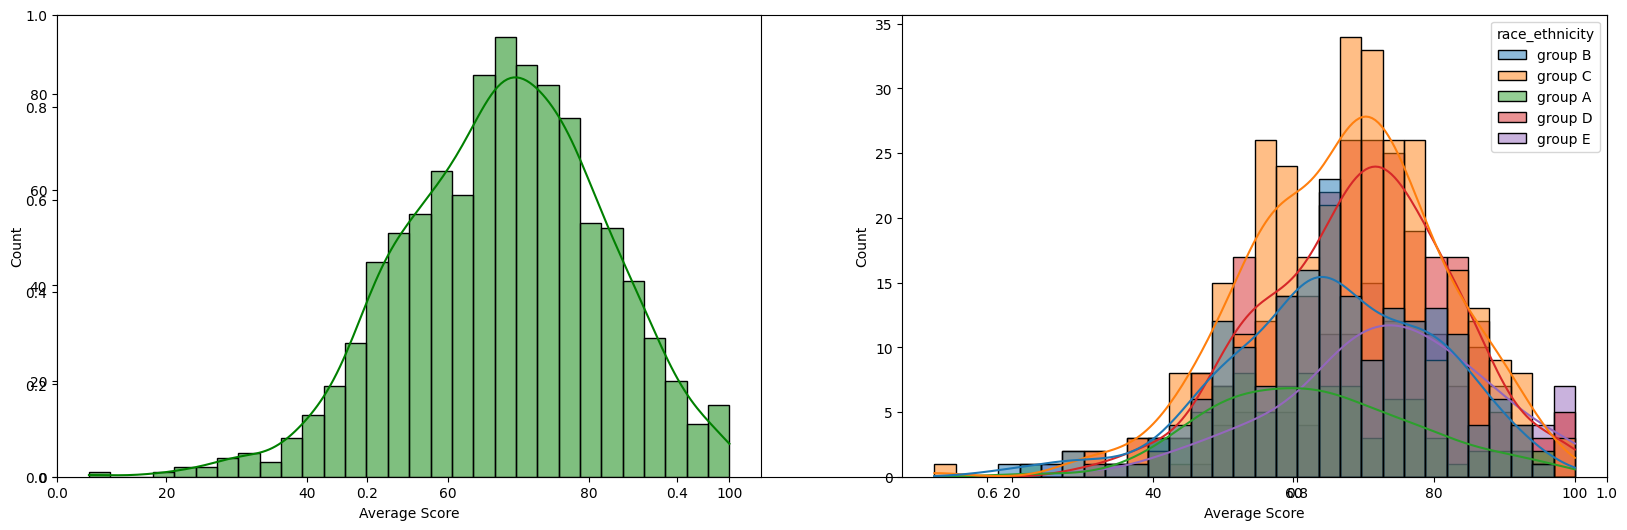

In [51]:
fig = plt.subplots(figsize=(20,6))
plt.subplot(121)
sns.histplot(data=df, x='Average Score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average Score', kde=True, hue='race_ethnicity', bins=30)
plt.show()

##Group C performs the best and group A performs the worst.

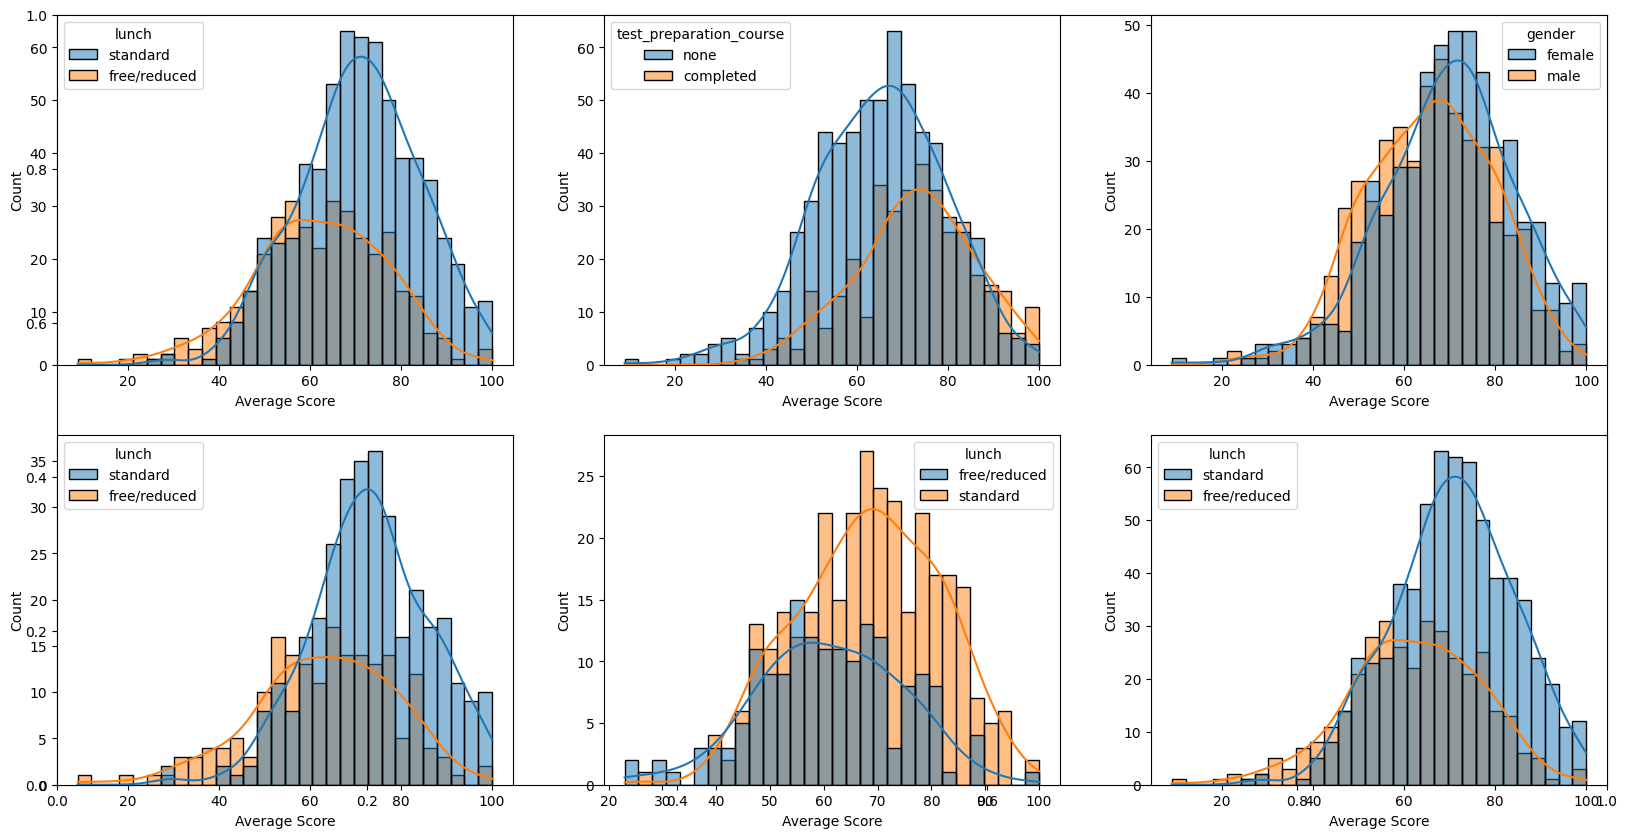

In [74]:
fig = plt.subplots(figsize=(20,10))
plt.subplot(231)
sns.histplot(data=df, x='Average Score', kde=True, hue='lunch', bins=30)
plt.subplot(232)
sns.histplot(data=df, x='Average Score', kde=True, hue='test_preparation_course', bins=30)
plt.subplot(233)
sns.histplot(data=df, x='Average Score', kde=True, hue='gender', bins=30)
plt.subplot(234)
sns.histplot(data=df[df.gender=='female'], x='Average Score', kde=True, hue='lunch', bins=30)
plt.subplot(235)
sns.histplot(data=df[df.gender=='male'], x='Average Score', kde=True, hue='lunch', bins=30)
plt.subplot(236)
sns.histplot(data=df, x='Average Score', kde=True, hue='lunch', bins=30)
plt.show()



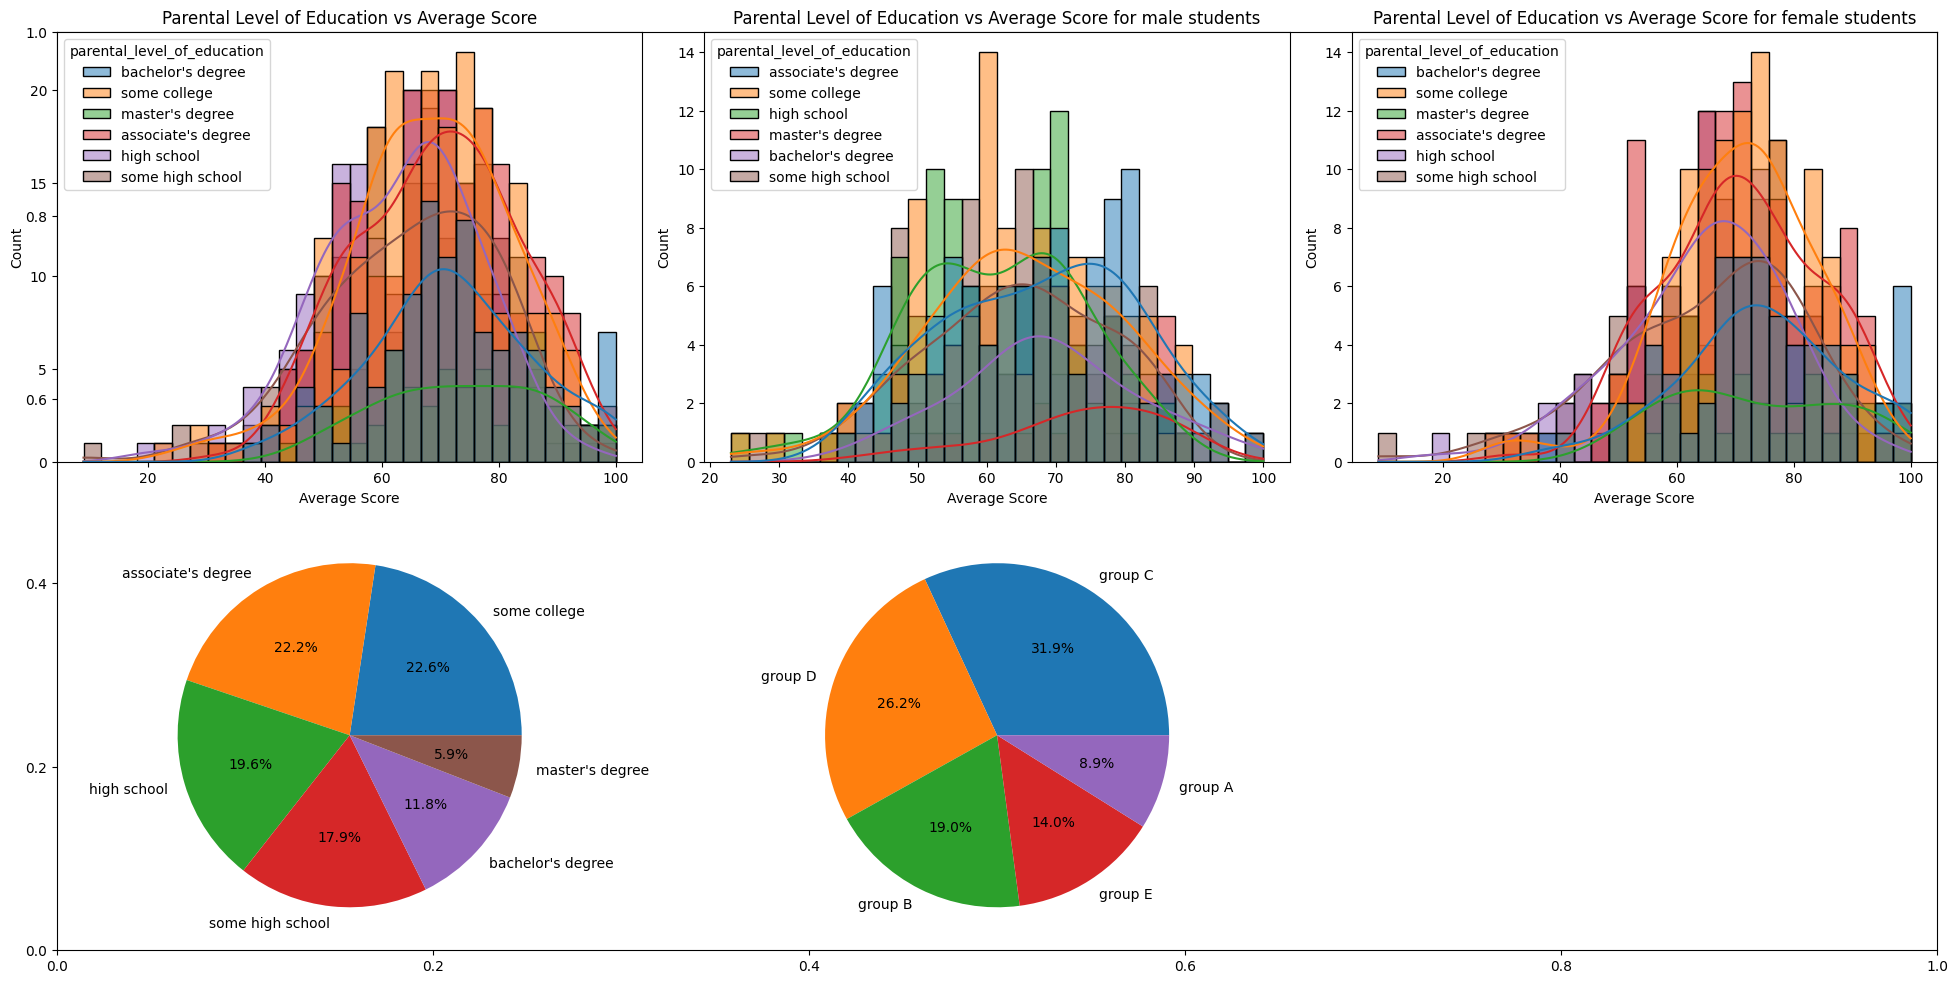

In [84]:
fig= plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.title('Parental Level of Education vs Average Score')
sns.histplot(data=df, x='Average Score', kde=True, hue='parental_level_of_education', bins=30)
plt.subplot(232)
plt.title('Parental Level of Education vs Average Score for male students')
sns.histplot(data=df[df.gender=='male'], x='Average Score',kde=True, hue='parental_level_of_education', bins=30)
plt.subplot(233)
plt.title('Parental Level of Education vs Average Score for female students')
sns.histplot(data=df[df.gender=='female'], x='Average Score',kde=True, hue='parental_level_of_education', bins=30)
plt.subplot(234)
plt.pie(df['parental_level_of_education'].value_counts(), labels=df['parental_level_of_education'].value_counts().index, autopct='%1.1f%%')
plt.subplot(235)
plt.pie(df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, autopct='%1.1f%%')
plt.tight_layout()

plt.show()